In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('test_results.gz')
df

,metric_name,timestamp,metric_value,check,error,error_code,expected_response,group,method,name,proto,scenario,service,status,subproto,tls_version,url,extra_tags
0,http_reqs,1666379430,1.000000,NaN,NaN,NaN,True,NaN,GET,https://test.k6.io,HTTP/1.1,default,NaN,200.0,NaN,tls1.3,https://test.k6.io,NaN
1,http_req_duration,1666379430,279.039000,NaN,NaN,NaN,True,NaN,GET,https://test.k6.io,HTTP/1.1,default,NaN,200.0,NaN,tls1.3,https://test.k6.io,NaN
2,http_req_blocked,1666379430,632.179000,NaN,NaN,NaN,True,NaN,GET,https://test.k6.io,HTTP/1.1,default,NaN,200.0,NaN,tls1.3,https://test.k6.io,NaN
3,http_req_connecting,1666379430,285.638000,NaN,NaN,NaN,True,NaN,GET,https://test.k6.io,HTTP/1.1,default,NaN,200.0,NaN,tls1.3,https://test.k6.io,NaN
4,http_req_tls_handshaking,1666379430,298.265000,NaN,NaN,NaN,True,NaN,GET,https://test.k6.io,HTTP/1.1,default,NaN,200.0,NaN,tls1.3,https://test.k6.io,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11937,vus_max,1666379550,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11938,data_sent,1666379550,98.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,default,NaN,NaN,NaN,NaN,NaN,NaN
11939,data_received,1666379550,11502.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,default,NaN,NaN,NaN,NaN,NaN,NaN
11940,iteration_duration,1666379550,1294.474958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,default,NaN,NaN,NaN,NaN,NaN,NaN


# Response time

<AxesSubplot: >

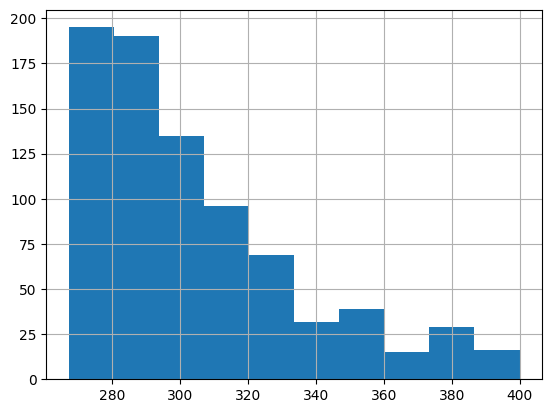

In [3]:
t = df[['metric_name', 'timestamp', 'metric_value', 'method', 'name', 'status']]
t = t[t['metric_name']=='http_req_duration']
t[t['metric_value']<400]['metric_value'].hist()

# Freq

In [4]:
t = df[['metric_name', 'timestamp', 'metric_value', 'method', 'name', 'status']]
t['timestamp'] = pd.to_datetime(t.timestamp, unit='s')
t = t[t['metric_name']=='http_reqs']
t

/var/folders/xk/qlytlcy54l10rbmtq3hl3qc80000gn/T/ipykernel_78864/845340183.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['timestamp'] = pd.to_datetime(t.timestamp, unit='s')


,metric_name,timestamp,metric_value,method,name,status
0,http_reqs,2022-10-21 19:10:30,1.0,GET,https://test.k6.io,200.0
9,http_reqs,2022-10-21 19:10:30,1.0,GET,https://test.k6.io,200.0
18,http_reqs,2022-10-21 19:10:30,1.0,GET,https://test.k6.io,200.0
27,http_reqs,2022-10-21 19:10:30,1.0,GET,https://test.k6.io,200.0
36,http_reqs,2022-10-21 19:10:30,1.0,GET,https://test.k6.io,200.0
...,...,...,...,...,...,...
11845,http_reqs,2022-10-21 19:12:29,1.0,GET,https://test.k6.io,200.0
11854,http_reqs,2022-10-21 19:12:29,1.0,GET,https://test.k6.io,200.0
11863,http_reqs,2022-10-21 19:12:29,1.0,GET,https://test.k6.io,200.0
11880,http_reqs,2022-10-21 19:12:29,1.0,GET,https://test.k6.io,200.0


In [5]:
t_groupby = t.groupby('timestamp').agg({'metric_value': ['count']})
t_groupby

,metric_value
,count
timestamp,
2022-10-21 19:10:30,10
2022-10-21 19:10:31,7
2022-10-21 19:10:32,3
2022-10-21 19:10:33,10
2022-10-21 19:10:34,8
...,...
2022-10-21 19:12:25,8
2022-10-21 19:12:26,8


array([[<AxesSubplot: title={'center': "('metric_value', 'count')"}>]],
      dtype=object)

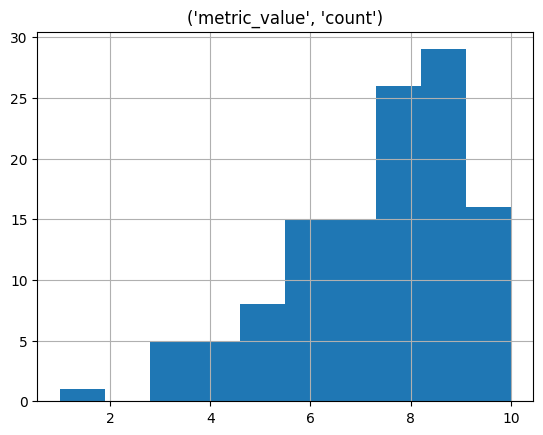

In [6]:
t_groupby.hist()